This is an example of filtering neural spike data. It's not using the Kaggle data, but instead the data from the Coursera course "Exploring Neural Data": https://www.coursera.org/course/neuraldata . 

This is from Problem Set 1 of that course. The data is neural spike data, so it's much more localised than the Kaggle data. Still, similar noise-filtering might be useful.

## Setup

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [5]:
# This will not work without the course data
import problem_set1

## Example

The problem set was to detect spikes. In the "easy" dataset spikes are obvious:

In [4]:
t,v = problem_set1.load_data('spikes_example.npy')

(2.01, 2.05)

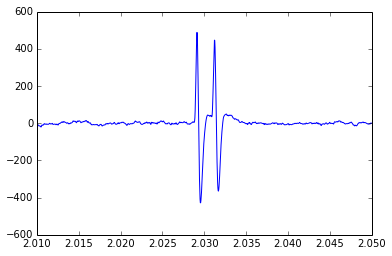

In [14]:
plt.plot(t,v)
plt.xlim((2.01,2.05))

In the "hard" dataset spikes are fairly obvious to humans but buried in noise:

In [158]:
(t3, v3) = problem_set1.load_data("spikes_hard_practice.npy")

(0.54, 0.56)

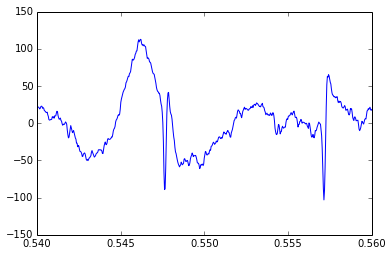

In [182]:
plt.plot(t3,v3)
plt.xlim(0.54,0.56)

Here is the most effective way I discovered to find spikes; filter by frequency to cut out the high-amplitude but low-frequency noise:

In [250]:
f3 = np.fft.rfft(v3)

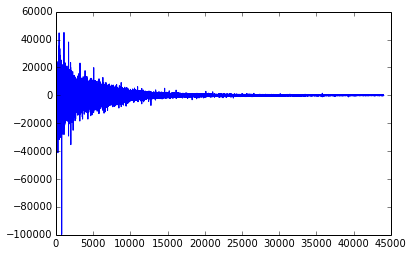

In [251]:
plt.plot(f3)

(0, 10000)

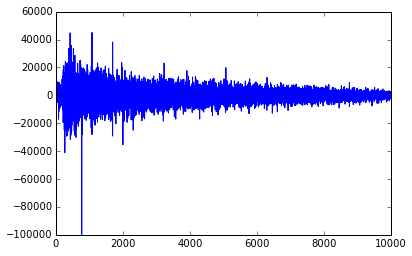

In [252]:
plt.plot(f3)
plt.xlim((0,10000))

In [253]:
f3[:3000] = 0

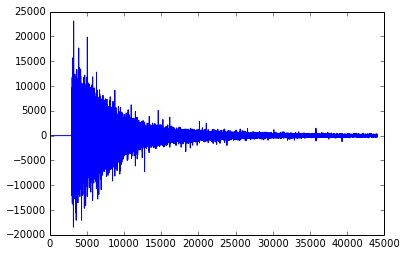

In [254]:
plt.plot(f3)

In [255]:
fv3 = np.fft.irfft(f3)

In [256]:
len(fv3), len(t3)

(88082, 88082)

(0.54, 0.56)

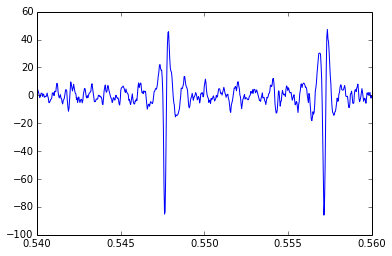

In [257]:
plt.plot(t3, fv3)
plt.xlim(0.54,0.56)

Here is just the noise (notice here the threshold is 5000 not 3000; this is in some arbitrary frequency units depending on the resolution of the original signal). I chose the cutoff based on observed with of the spikes I was trying to detect.

In [238]:
f3_low = np.fft.rfft(v3)
f3_low[5000:] = 0
v3_low = np.fft.irfft(f3_low)

(0.54, 0.56)

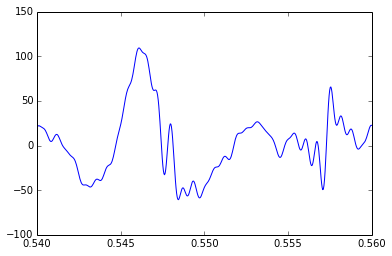

In [239]:
plt.plot(t3,v3_low)
plt.xlim(0.54,0.56)